In [3]:
#Antoine GARGOT - CS 555 - Project
from components.welch import WelchAlgorithm
from components.dataVizualiser import DataVizualiser
import matplotlib.pyplot as plot
from components.systemSimulation import SystemSimulation
import numpy as np
import time

In [4]:
np.random.seed(int(time.time()))
first_set = np.random.uniform(0,1,1000000)
np.random.seed(int(time.time())+ 2000)
second_set = np.random.uniform(0,1,1000000)
first_set.sort()
second_set.sort()
compare = first_set - second_set
compare

array([ -2.58391028e-06,  -3.59212421e-08,   6.82596723e-07, ...,
         2.99311095e-06,   2.46863948e-06,   8.42374892e-08])

In [5]:
np.random.uniform(0,1)

0.21650388744392624

In [6]:
def simple_system_simulation(similation_time, arrival_rate, nb_customers, service_rate, no_of_servers, capacity):
    simulation = SystemSimulation(arrival_rate, nb_customers, service_rate, no_of_servers, capacity)
    customers, measures = simulation.main_simulation_loop(similation_time)
    data = [measures[time].system_length for time in [measure for measure in measures]]
    plot.plot(data)
    plot.grid()
    plot.xlim([0,similation_time])
    plot.xlabel('Time')
    plot.ylabel('Customers in the system')
    plot.show()

In [7]:
def elimination_of_warmup_period(similation_time, arrival_rate, nb_customers, service_rate, no_of_servers, capacity, simulation_nb, window):
    simulation = WelchAlgorithm(simulation_nb, window, similation_time)
    mean_measures, welch_measure = simulation.launch(arrival_rate, nb_customers, service_rate, no_of_servers, capacity)
    plot.figure()
    plot.plot(mean_measures, label='Mean mesures of simulations')
    plot.plot(welch_measure, label='Welch algorithm of the simulation')
    plot.grid()
    plot.legend(loc='best')
    plot.xlim([0,similation_time])
    plot.xlabel('Time')
    plot.ylabel('Customers in the system')
    plot.show()

In [8]:
def batch_measure(similation_time, arrival_rate, nb_customers, service_rate, no_of_servers, capacity, warmmup_period , batch_size):
    simulation = SystemSimulation(arrival_rate, nb_customers, service_rate, no_of_servers, capacity, True, warmmup_period , batch_size)
    customers, batch_measures = simulation.main_simulation_loop(similation_time)
    total_nb_of_accepted_customers = []
    total_nb_customers = []
    system_size = []
    simulation_mean_system_size = []
    average_wait = []
    for batch_measure in batch_measures:
        total_nb_of_accepted_customers.append(len(batch_measures[batch_measure]["customers"]))
        total_nb_customers.append(batch_measures[batch_measure]["nb_customers"])
        for customers in [batch_measures[batch_measure]["customers"]]:
            average_wait.append(float(sum(customers[ID].wait for ID in customers)) / max(len(customers), 1))
        for measure in [batch_measures[batch_measure]["measures"]]:
            for data in measure:
                system_size.append(measure[data].system_length)
            simulation_mean_system_size.append(float(sum(system_size)/len(system_size)))
            system_size = []
    return total_nb_of_accepted_customers, total_nb_customers, simulation_mean_system_size, average_wait

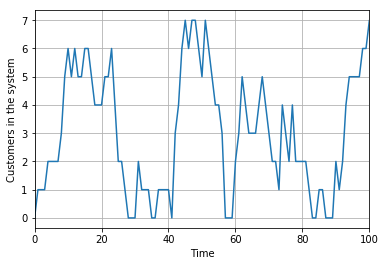

In [26]:
simple_system_simulation(100, 2, 0, 1, 2, 5)


System A: arrival rate lambda=2, service rate of each server mu=1
With x(t=0) = 0

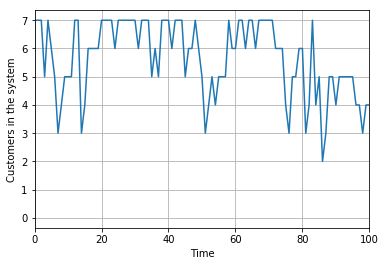

In [30]:
simple_system_simulation(100, 2, 7, 1, 2, 5)

System A: arrival rate lambda=2, service rate of each server mu=1
With x(t=0) = 7

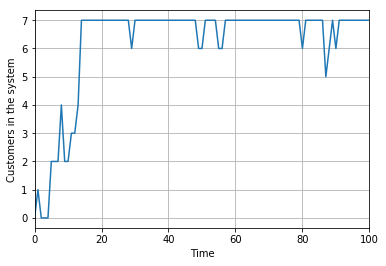

In [6]:
simple_system_simulation(100, 10, 0, 1, 2, 5)

System B: lambda=10, mu=1     With x(t=0) = 0

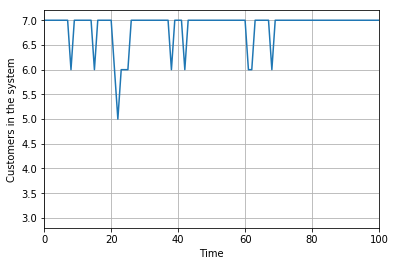

In [7]:
simple_system_simulation(100, 10, 7, 1, 2, 5)

System B: lambda=10, mu=1     With x(t=0) = 7

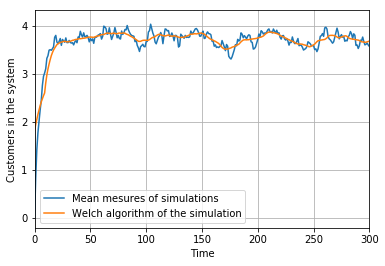

In [33]:
elimination_of_warmup_period(300, 2, 0, 1, 2, 5, 400, 9)

System A: arrival rate lambda=2, service rate of each server mu=1
With x(t=0) = 0
We can erase the warmup period by capturing signals from T = 60

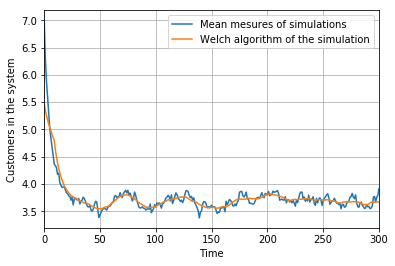

In [34]:
elimination_of_warmup_period(300, 2, 7, 1, 2, 5, 400, 9)

System A: arrival rate lambda=2, service rate of each server mu=1
With x(t=0) = 7
We can erase the warmup period by capturing signals from T = 60

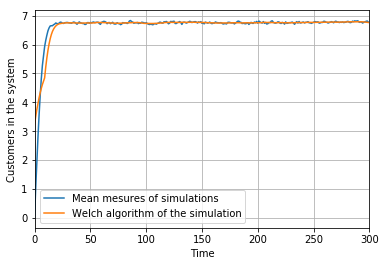

In [35]:
elimination_of_warmup_period(300, 10, 0, 1, 2, 5, 400, 9)

System B: lambda=10, mu=1     With x(t=0) = 0
We can erase the warmup period by capturing signals from T = 40

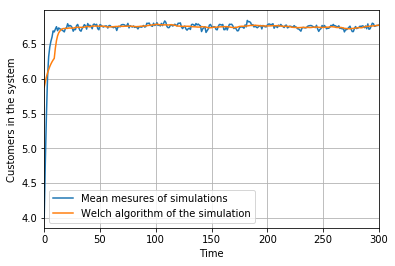

In [36]:
elimination_of_warmup_period(300, 10, 4, 1, 2, 5, 400, 9)

System B: lambda=10, mu=1     With x(t=0) = 0
We can erase the warmup period by capturing signals from T = 40

In [39]:
total_nb_of_accepted_customers, total_nb_customers,system_size,average_wait = batch_measure(4050, 2, 0, 1, 2, 5, 50, 100)

Total number of customers: [201, 196, 185, 175, 224, 211, 200, 203, 206, 184, 186, 202, 194, 203, 194, 215, 187, 187, 181, 206, 202, 185, 233, 200, 234, 188, 203, 204, 220, 178, 189, 190, 197, 201, 197, 201, 195, 202, 175] 

Total number of accepted user in the system: [179, 165, 156, 164, 184, 201, 173, 178, 161, 161, 168, 171, 157, 184, 184, 186, 180, 163, 164, 172, 173, 166, 197, 175, 212, 165, 176, 174, 157, 170, 177, 173, 180, 164, 174, 175, 162, 169, 161] 

array of blocking probabilities : [0.10945273631840796, 0.15816326530612246, 0.15675675675675677, 0.06285714285714286, 0.17857142857142858, 0.04739336492890995, 0.135, 0.12315270935960591, 0.21844660194174756, 0.125, 0.0967741935483871, 0.15346534653465346, 0.19072164948453607, 0.09359605911330049, 0.05154639175257732, 0.13488372093023257, 0.0374331550802139, 0.12834224598930483, 0.09392265193370165, 0.1650485436893204, 0.14356435643564355, 0.10270270270270271, 0.15450643776824036, 0.125, 0.09401709401709402, 0.122340425531914

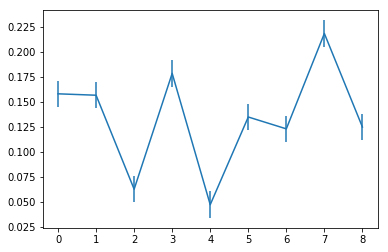

In [40]:
print("Total number of customers:",total_nb_customers ,"\n")
print("Total number of accepted user in the system:", total_nb_of_accepted_customers,"\n")
blocking_probability = []
for i in range(len(total_nb_customers)):
    blocking_probability.append(float((total_nb_customers[i]-total_nb_of_accepted_customers[i])/total_nb_customers[i]))
print("array of blocking probabilities :" ,blocking_probability, "\n")
final_blocking_probability = float(sum(blocking_probability)/len(blocking_probability))
print("Mean blocking probability :", final_blocking_probability, "\n")
variance_blocking_probability = np.var(blocking_probability)
print("Variance of the blocking probability", variance_blocking_probability, "\n")
blocking_probability_error_range = 1.65 * np.sqrt(variance_blocking_probability/len(blocking_probability))
print("Blocking probability error range",blocking_probability_error_range, "\n")
plot.errorbar(range(len(blocking_probability[1:10])), blocking_probability[1:10], yerr=blocking_probability_error_range)
plot.show()

Array of waiting means : [2.057903982427272, 2.2196417469702006, 2.537542534731209, 1.8467696017856574, 2.418914630599954, 1.8718250505365592, 2.1881363130056553, 2.4653799683199686, 2.9358489254049487, 1.9802970285714194, 2.187413317884357, 1.7299874085036684, 2.4938502208340125, 1.82080170960974, 1.7141575502580162, 2.1234953194124064, 1.7074745760377166, 1.9800283152218165, 2.0531184865430725, 1.9970041242658898, 2.375324301160691, 2.2871896283122077, 2.168516811898203, 2.1169815665095277, 1.9261845564379754, 2.159482679380025, 2.0510214604360275, 2.1666720173308915, 2.929432984776937, 1.749045821819578, 2.067417023823856, 2.165942471498826, 2.208363186124176, 2.3074970662844074, 2.3495578913454285, 2.2260049178861925, 2.501353395286871, 2.525835955548504, 1.5131702254229031] 

Mean wait : 2.157040635184788 

Variance of wait : 0.093687205776 

Wait error range 0.0808708082931 



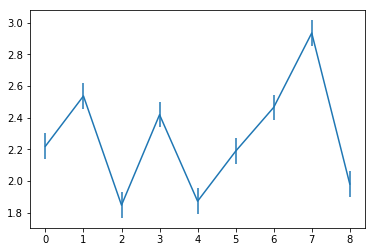

In [41]:
print("Array of waiting means :" ,average_wait, "\n")
final_average_wait = float(sum(average_wait)/len(average_wait))
print("Mean wait :", final_average_wait, "\n")
variance_wait = np.var(average_wait)
print("Variance of wait :", variance_wait, "\n")
wait_error_range = 1.65 * np.sqrt(variance_wait/len(average_wait))
print("Wait error range",wait_error_range, "\n")
plot.errorbar(range(len(average_wait[1:10])), average_wait[1:10], yerr=wait_error_range)
plot.show()

Array of system size means : [3.505, 3.76, 3.97, 2.95, 4.475, 3.64, 3.815, 4.345, 4.655, 3.355, 3.58, 3.005, 3.775, 3.42, 3.18, 3.89, 2.98, 3.385, 3.365, 3.42, 4.115, 3.785, 4.295, 3.84, 3.915, 3.425, 3.835, 3.775, 4.66, 2.98, 3.65, 3.775, 3.955, 3.82, 4.035, 3.77, 4.06, 4.365, 2.465] 

Mean size : 3.717692307692308 

Variance of wait : 0.227334418146 

System Size error range 0.125974962246 



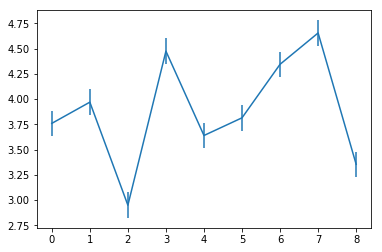

In [42]:
print("Array of system size means :" ,system_size, "\n")
final_system_size = float(sum(system_size)/len(system_size))
print("Mean size :", final_system_size, "\n")
variance_system_size = np.var(system_size)
print("Variance of wait :", variance_system_size, "\n")
system_size_error_range = 1.65 * np.sqrt(variance_system_size/len(system_size))
print("System Size error range",system_size_error_range, "\n")
plot.errorbar(range(len(system_size[1:10])), system_size[1:10], yerr=system_size_error_range)
plot.show()

In [43]:
total_nb_of_accepted_customers, total_nb_customers, system_size, average_wait = batch_measure(4050, 2, 7, 1, 2, 5, 50, 100)

Total number of customers: [179, 215, 171, 218, 206, 215, 196, 193, 193, 201, 216, 193, 185, 193, 199, 211, 192, 207, 225, 188, 210, 187, 206, 226, 200, 201, 191, 191, 211, 199, 176, 192, 223, 194, 198, 192, 209, 190, 211] 

Total number of accepted user in the system: [165, 179, 155, 175, 176, 180, 166, 177, 164, 170, 195, 168, 168, 166, 188, 174, 156, 156, 196, 173, 175, 165, 163, 198, 173, 171, 170, 171, 185, 166, 157, 168, 195, 180, 162, 163, 166, 176, 200] 

array of blocking probabilities : [0.0782122905027933, 0.16744186046511628, 0.0935672514619883, 0.19724770642201836, 0.14563106796116504, 0.16279069767441862, 0.15306122448979592, 0.08290155440414508, 0.15025906735751296, 0.15422885572139303, 0.09722222222222222, 0.12953367875647667, 0.0918918918918919, 0.13989637305699482, 0.05527638190954774, 0.17535545023696683, 0.1875, 0.2463768115942029, 0.1288888888888889, 0.0797872340425532, 0.16666666666666666, 0.11764705882352941, 0.2087378640776699, 0.12389380530973451, 0.135, 0.1492

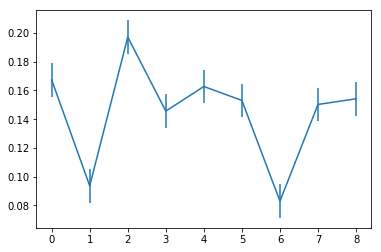

In [44]:
print("Total number of customers:",total_nb_customers ,"\n")
print("Total number of accepted user in the system:", total_nb_of_accepted_customers,"\n")
blocking_probability = []
for i in range(len(total_nb_customers)):
    blocking_probability.append(float((total_nb_customers[i]-total_nb_of_accepted_customers[i])/total_nb_customers[i]))
print("array of blocking probabilities :" ,blocking_probability, "\n")
final_blocking_probability = float(sum(blocking_probability)/len(blocking_probability))
print("Mean blocking probability :", final_blocking_probability, "\n")
variance_blocking_probability = np.var(blocking_probability)
print("Variance of the blocking probability", variance_blocking_probability, "\n")
blocking_probability_error_range = 1.65 * np.sqrt(variance_blocking_probability/len(blocking_probability))
print("Blocking probability error range",blocking_probability_error_range, "\n")
plot.errorbar(range(len(blocking_probability[1:10])), blocking_probability[1:10], yerr=blocking_probability_error_range)
plot.show()

Array of waiting means : [1.773648651312973, 2.2981189703541425, 1.9402353922227755, 2.837472819195603, 2.412853292286658, 2.313173101483214, 2.3900407811279654, 1.7580404300406076, 1.9885022821983127, 1.9431570891921925, 1.9102418759525908, 2.1498855334531393, 2.104034284688423, 2.2034845429078698, 1.5489119437673777, 2.6343345659947066, 2.4815090486616507, 2.9642401217216845, 1.8992179164830671, 1.9920485591237804, 2.0719291498441557, 1.8907993082739654, 2.310080808658243, 2.3124209635120816, 2.2303742509768956, 2.77050240676937, 2.0779732518426153, 1.8959976194888408, 1.9773761250061226, 2.2855844903435973, 2.103399772197176, 1.9854431279627183, 2.096544853587833, 1.8378853290185462, 2.795664439921761, 2.381575777458539, 2.4362764604784006, 1.9414500425020058, 1.7474380588959888] 

Mean wait : 2.1715863445873747 

Variance of wait : 0.104592951811 

Wait error range 0.0854481866255 



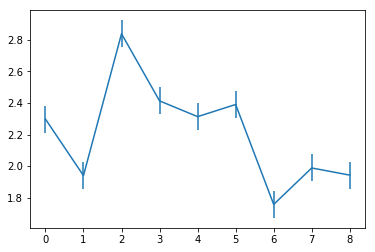

In [45]:
print("Array of waiting means :" ,average_wait, "\n")
final_average_wait = float(sum(average_wait)/len(average_wait))
print("Mean wait :", final_average_wait, "\n")
variance_wait = np.var(average_wait)
print("Variance of wait :", variance_wait, "\n")
wait_error_range = 1.65 * np.sqrt(variance_wait/len(average_wait))
print("Wait error range",wait_error_range, "\n")
plot.errorbar(range(len(average_wait[1:10])), average_wait[1:10], yerr=wait_error_range)
plot.show()

Array of system size means : [2.995, 4.15, 3.025, 4.82, 4.305, 4.215, 3.875, 3.18, 3.275, 3.295, 3.66, 3.685, 3.38, 3.755, 2.865, 4.62, 3.755, 4.715, 3.71, 3.49, 3.56, 3.165, 3.745, 4.375, 3.975, 4.72, 3.59, 3.23, 3.51, 3.995, 3.33, 3.385, 4.12, 3.28, 4.54, 3.695, 4.24, 3.425, 3.565] 

Mean size : 3.749102564102565 

Variance of wait : 0.262471630506 

System Size error range 0.135360772833 



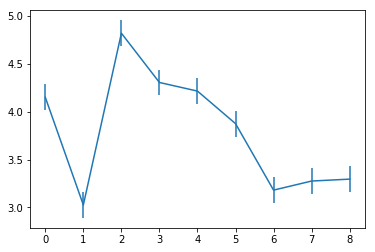

In [46]:
print("Array of system size means :" ,system_size, "\n")
final_system_size = float(sum(system_size)/len(system_size))
print("Mean size :", final_system_size, "\n")
variance_system_size = np.var(system_size)
print("Variance of wait :", variance_system_size, "\n")
system_size_error_range = 1.65 * np.sqrt(variance_system_size/len(system_size))
print("System Size error range",system_size_error_range, "\n")
plot.errorbar(range(len(system_size[1:10])), system_size[1:10], yerr=system_size_error_range)
plot.show()

In [47]:
total_nb_of_accepted_customers, total_nb_customers, system_size, average_wait = batch_measure(4040, 10, 0, 1, 2, 5, 40, 100)

Total number of customers: [966, 958, 1033, 1020, 1024, 975, 956, 1015, 992, 960, 995, 997, 998, 1031, 950, 1028, 1008, 946, 978, 945, 961, 971, 988, 1001, 988, 987, 997, 1050, 1058, 961, 980, 980, 976, 984, 1075, 1020, 947, 946, 978] 

Total number of accepted user in the system: [203, 187, 202, 228, 198, 189, 208, 214, 195, 196, 211, 196, 216, 210, 175, 193, 191, 204, 199, 192, 218, 204, 186, 210, 202, 189, 201, 204, 201, 193, 186, 208, 197, 183, 239, 190, 206, 198, 190] 

array of blocking probabilities : [0.7898550724637681, 0.8048016701461378, 0.8044530493707648, 0.7764705882352941, 0.806640625, 0.8061538461538461, 0.7824267782426778, 0.7891625615763547, 0.8034274193548387, 0.7958333333333333, 0.7879396984924623, 0.8034102306920762, 0.7835671342685371, 0.7963142580019399, 0.8157894736842105, 0.8122568093385214, 0.810515873015873, 0.7843551797040169, 0.7965235173824131, 0.7968253968253968, 0.7731529656607701, 0.7899073120494335, 0.8117408906882592, 0.7902097902097902, 0.79554655870

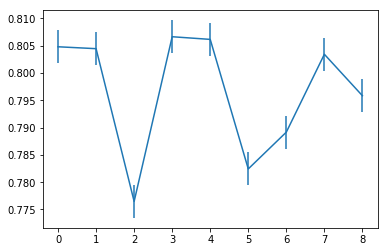

In [48]:
print("Total number of customers:",total_nb_customers ,"\n")
print("Total number of accepted user in the system:", total_nb_of_accepted_customers,"\n")
blocking_probability = []
for i in range(len(total_nb_customers)):
    blocking_probability.append(float((total_nb_customers[i]-total_nb_of_accepted_customers[i])/total_nb_customers[i]))
print("array of blocking probabilities :" ,blocking_probability, "\n")
final_blocking_probability = float(sum(blocking_probability)/len(blocking_probability))
print("Mean blocking probability :", final_blocking_probability, "\n")
variance_blocking_probability = np.var(blocking_probability)
print("Variance of the blocking probability", variance_blocking_probability, "\n")
blocking_probability_error_range = 1.65 * np.sqrt(variance_blocking_probability/len(blocking_probability))
print("Blocking probability error range",blocking_probability_error_range, "\n")
plot.errorbar(range(len(blocking_probability[1:10])), blocking_probability[1:10], yerr=blocking_probability_error_range)
plot.show()

Array of waiting means : [3.402175694662133, 3.5368229525222543, 3.342369814797993, 2.9631527530110646, 3.379396287054035, 3.6017383798029794, 3.197159949805451, 3.15294492447952, 3.511650725428987, 3.3988444789490906, 3.157194632841356, 3.523667121148905, 3.099265127280948, 3.23522481847586, 3.909624379638057, 3.4136677918075486, 3.574495092490416, 3.2905745891700158, 3.334988308513415, 3.507068409267434, 3.1127487270712875, 3.29817661086358, 3.6348986661563374, 3.2056256581612033, 3.368645174217793, 3.5136818318552723, 3.382015788720355, 3.3223200779688447, 3.3448401704054387, 3.523815662376437, 3.5714473278476877, 3.277308647790794, 3.4469968341114936, 3.6308270395012645, 2.8050424737726685, 3.5628259536651345, 3.2991813634711704, 3.3777815908198927, 3.5892366248760337] 

Mean wait : 3.3794728834564136 

Variance of wait : 0.0413704051166 

Wait error range 0.0537398596112 



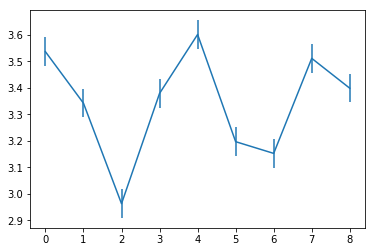

In [49]:
print("Array of waiting means :" ,average_wait, "\n")
final_average_wait = float(sum(average_wait)/len(average_wait))
print("Mean wait :", final_average_wait, "\n")
variance_wait = np.var(average_wait)
print("Variance of wait :", variance_wait, "\n")
wait_error_range = 1.65 * np.sqrt(variance_wait/len(average_wait))
print("Wait error range",wait_error_range, "\n")
plot.errorbar(range(len(average_wait[1:10])), average_wait[1:10], yerr=wait_error_range)
plot.show()

Array of system size means : [6.706, 6.783, 6.753, 6.689, 6.791, 6.753, 6.739, 6.745, 6.702, 6.766, 6.711, 6.763, 6.719, 6.758, 6.798, 6.77, 6.761, 6.748, 6.711, 6.714, 6.673, 6.742, 6.757, 6.733, 6.753, 6.761, 6.744, 6.75, 6.742, 6.729, 6.747, 6.734, 6.729, 6.78, 6.698, 6.791, 6.694, 6.763, 6.729] 

Mean size : 6.741769230769232 

Variance of wait : 0.000861767258383 

System Size error range 0.00775615778682 



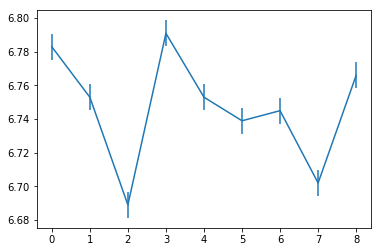

In [50]:
print("Array of system size means :" ,system_size, "\n")
final_system_size = float(sum(system_size)/len(system_size))
print("Mean size :", final_system_size, "\n")
variance_system_size = np.var(system_size)
print("Variance of wait :", variance_system_size, "\n")
system_size_error_range = 1.65 * np.sqrt(variance_system_size/len(system_size))
print("System Size error range",system_size_error_range, "\n")
plot.errorbar(range(len(system_size[1:10])), system_size[1:10], yerr=system_size_error_range)
plot.show()

In [51]:
total_nb_of_accepted_customers, total_nb_customers, system_size, average_wait = batch_measure(4040, 10, 4, 1, 2, 5, 40, 100)

Total number of customers: [1009, 987, 998, 1023, 969, 997, 995, 1003, 987, 1032, 967, 1022, 986, 987, 995, 965, 1010, 1024, 987, 1010, 997, 1009, 985, 962, 969, 1018, 1031, 1065, 984, 1017, 974, 1034, 931, 1000, 1009, 975, 995, 978, 1026] 

Total number of accepted user in the system: [216, 200, 197, 203, 206, 227, 206, 183, 207, 154, 192, 207, 196, 209, 199, 191, 212, 195, 201, 211, 192, 189, 211, 188, 211, 186, 198, 199, 199, 219, 197, 193, 210, 197, 198, 204, 220, 210, 202] 

array of blocking probabilities : [0.7859266600594648, 0.7973657548125633, 0.8026052104208417, 0.8015640273704789, 0.7874097007223942, 0.7723169508525577, 0.792964824120603, 0.8175473579262214, 0.790273556231003, 0.8507751937984496, 0.8014477766287487, 0.7974559686888454, 0.8012170385395537, 0.7882472137791287, 0.8, 0.8020725388601037, 0.7900990099009901, 0.8095703125, 0.7963525835866262, 0.7910891089108911, 0.8074222668004012, 0.8126858275520317, 0.7857868020304568, 0.8045738045738046, 0.782249742002064, 0.81

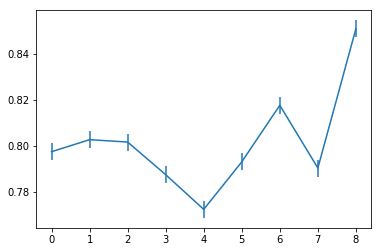

In [52]:
print("Total number of customers:",total_nb_customers ,"\n")
print("Total number of accepted user in the system:", total_nb_of_accepted_customers,"\n")
blocking_probability = []
for i in range(len(total_nb_customers)):
    blocking_probability.append(float((total_nb_customers[i]-total_nb_of_accepted_customers[i])/total_nb_customers[i]))
print("array of blocking probabilities :" ,blocking_probability, "\n")
final_blocking_probability = float(sum(blocking_probability)/len(blocking_probability))
print("Mean blocking probability :", final_blocking_probability, "\n")
variance_blocking_probability = np.var(blocking_probability)
print("Variance of the blocking probability", variance_blocking_probability, "\n")
blocking_probability_error_range = 1.65 * np.sqrt(variance_blocking_probability/len(blocking_probability))
print("Blocking probability error range",blocking_probability_error_range, "\n")
plot.errorbar(range(len(blocking_probability[1:10])), blocking_probability[1:10], yerr=blocking_probability_error_range)
plot.show()

Array of waiting means : [3.106085772650641, 3.4072623940518945, 3.436193288011775, 3.285479204432385, 3.2317769333205644, 2.9660143804836685, 3.262047166384862, 3.7713403277537427, 3.177402676821729, 4.42852877552031, 3.547152644512971, 3.273960746510936, 3.424920036286429, 3.2366104380321334, 3.3363074193498767, 3.653719416182258, 3.066545315670291, 3.4339734182987844, 3.4223725846786386, 3.1658353318395087, 3.52663511057003, 3.5885862123275647, 3.189030446319982, 3.5610439532049076, 3.2043209957726706, 3.6022465456365707, 3.4468524847829918, 3.459408609351014, 3.3001917996488026, 3.1027232670286704, 3.3980074717292457, 3.523660260889487, 3.1594937268107643, 3.504797953498516, 3.3686502152083397, 3.329124186987277, 3.0173494749341816, 3.243103501130329, 3.3177878889901327] 

Mean wait : 3.371193394246534 

Variance of wait : 0.0621455976424 

Wait error range 0.0658653228831 



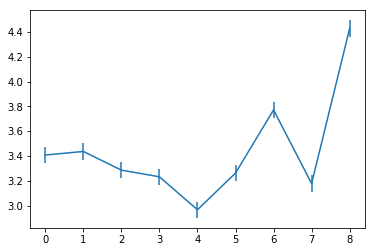

In [53]:
print("Array of waiting means :" ,average_wait, "\n")
final_average_wait = float(sum(average_wait)/len(average_wait))
print("Mean wait :", final_average_wait, "\n")
variance_wait = np.var(average_wait)
print("Variance of wait :", variance_wait, "\n")
wait_error_range = 1.65 * np.sqrt(variance_wait/len(average_wait))
print("Wait error range",wait_error_range, "\n")
plot.errorbar(range(len(average_wait[1:10])), average_wait[1:10], yerr=wait_error_range)
plot.show()

Array of system size means : [6.725, 6.753, 6.737, 6.734, 6.71, 6.702, 6.742, 6.749, 6.733, 6.828, 6.702, 6.736, 6.782, 6.684, 6.737, 6.734, 6.76, 6.735, 6.763, 6.712, 6.761, 6.766, 6.731, 6.731, 6.728, 6.758, 6.798, 6.78, 6.726, 6.721, 6.749, 6.785, 6.669, 6.765, 6.76, 6.776, 6.702, 6.75, 6.744] 

Mean size : 6.74251282051282 

Variance of wait : 0.000944967784352 

System Size error range 0.00812194683132 



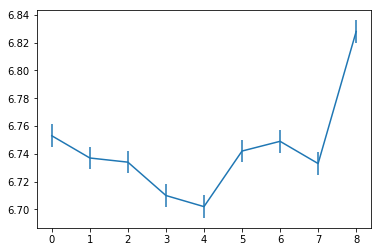

In [54]:
print("Array of system size means :" ,system_size, "\n")
final_system_size = float(sum(system_size)/len(system_size))
print("Mean size :", final_system_size, "\n")
variance_system_size = np.var(system_size)
print("Variance of wait :", variance_system_size, "\n")
system_size_error_range = 1.65 * np.sqrt(variance_system_size/len(system_size))
print("System Size error range",system_size_error_range, "\n")
plot.errorbar(range(len(system_size[1:10])), system_size[1:10], yerr=system_size_error_range)
plot.show()